In [34]:
%matplotlib inline
# fix DPI issues on mac
%config InlineBackend.figure_format = 'retina'
 # autoreload workflow, reload modules every time cell is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import numpy as np
import matplotlib.pyplot as plt
default_color_list = plt.rcParams['axes.prop_cycle'].by_key()['color'] # get default colors
import matplotlib
from astropy.table import Table
from scipy.special import erf
import h5py

In [122]:
data_size = 1024

In [123]:
def get_prim(filename, custom=0):
    
    f = h5py.File(filename, 'r')
    dataset = f['prim']
    dd = np.array(dataset).reshape(5,data_size)
    r = f['x1v'][0]
    
    # rho, press, vel1, vel2, vel3
    return r, dd[custom]
    # data1.colnames
    

In [124]:
def plot_prim(filename, custom=0):
    
    f = h5py.File(filename, 'r')
    dataset = f['prim']
    dd = np.array(dataset).reshape(5,data_size)
    r = f['x1v'][0]
    
    # rho, press, vel1, vel2, vel3

    # data1.colnames
    plt.plot( r, dd[custom], label='t=0 s' )
    # plt.plot( r, data2['rho'], label=r't=$5 \times 10^4$ s' )
    # plt.plot( r, data3['rho'], label=r't=$10 \times 10^4$ s' )

#     plt.plot( s13['col2'], s13['col4'] )

    plt.ylabel(r'$\rho$ (g/cm$^3$)')
    plt.xlabel(r'$r$ (cm)')
    plt.legend()
#     plt.yscale('log')

In [125]:
def get_uov(filename, custom=0):
    
    f = h5py.File(filename, 'r')
    dataset = f['hydro']
    dd = np.array(dataset).reshape(2,data_size)
    r = f['x1v'][0]
    return r, dd[custom]

In [126]:
def plot_uov(filename, custom=0):
    r, ddcustom = get_uov(filename, custom)
    # rho, press, vel1, vel2, vel3
    plt.plot( r, ddcustom, label='simulation' )

In [138]:
r, src_over_rho = get_uov('SN.out2.' + str(2).zfill(5) + '.athdf',0)
r, rho = get_prim('SN.out1.' + str(2).zfill(5) + '.athdf', 0)
r, P = get_prim('SN.out1.' + str(2).zfill(5) + '.athdf', 1)
    
plt.plot( r, src_over_rho*rho, '--' )
plt.plot( r, -np.gradient(P,r), '--' )
plt.yscale('log')
plt.tight_layout()
# plt.xlim(0,2e13)

ValueError: cannot reshape array of size 8192 into shape (2,1024)

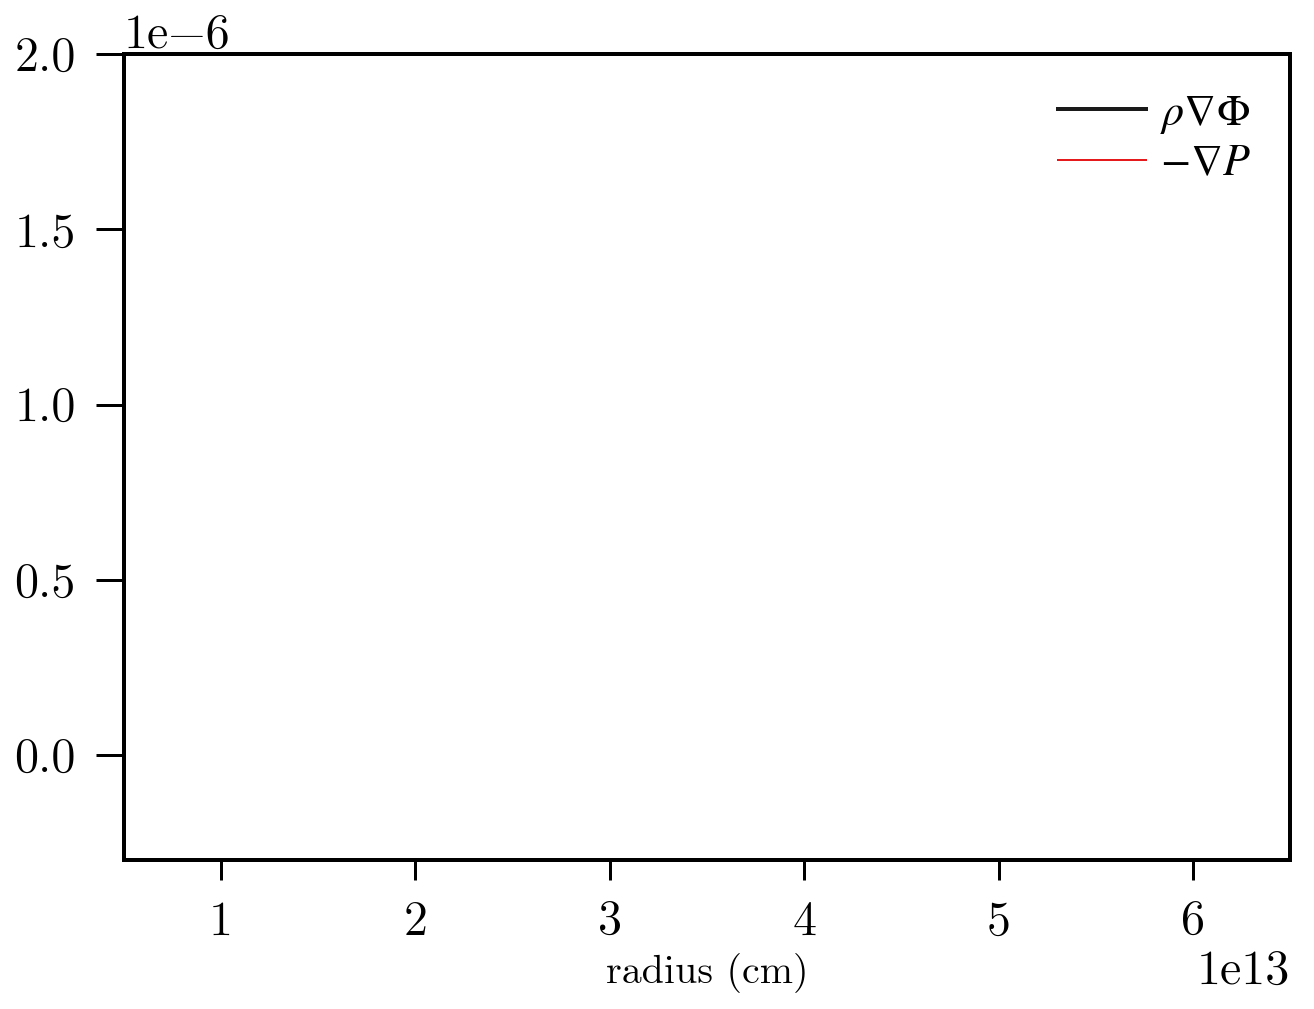

In [128]:
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(9,8))

ax.set_xlim((0.5e13,6.5e13 ))
ax.set_ylim((-3e-7,2e-6))
# ax.set_yscale('log')

line1, = ax.plot([], [], lw=2, label=r'$\rho \nabla \Phi$')
line2, = ax.plot([], [], lw=1, label=r'$-\nabla P$')
time_text = ax.text(0.02, 0.92, '', transform=ax.transAxes, fontsize=20)

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return (line1,)

# animation function. This is called sequentially
def animate(i):
    
    r, src_over_rho = get_uov('SN.out2.' + str(i).zfill(5) + '.athdf',0)
    r, rho = get_prim('SN.out1.' + str(i).zfill(5) + '.athdf', 0)
    r, P = get_prim('SN.out1.' + str(i).zfill(5) + '.athdf', 1)
    
    time_text.set_text('time = %.2e' %  (i*1e4) )
    
    line1.set_data(r,src_over_rho*rho)
    line2.set_data(r, -np.gradient(P,r))
    return (line1,)

ax.autoscale(enable=False, axis='both', tight=None)
fig.subplots_adjust(left=0.1, bottom=0.2, right=1, top=0.9, wspace=0.1, hspace=0.1)
ax.set_xlabel('radius (cm)')
ax.legend();

In [129]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=20, blit=True)
HTML(anim.to_html5_video())

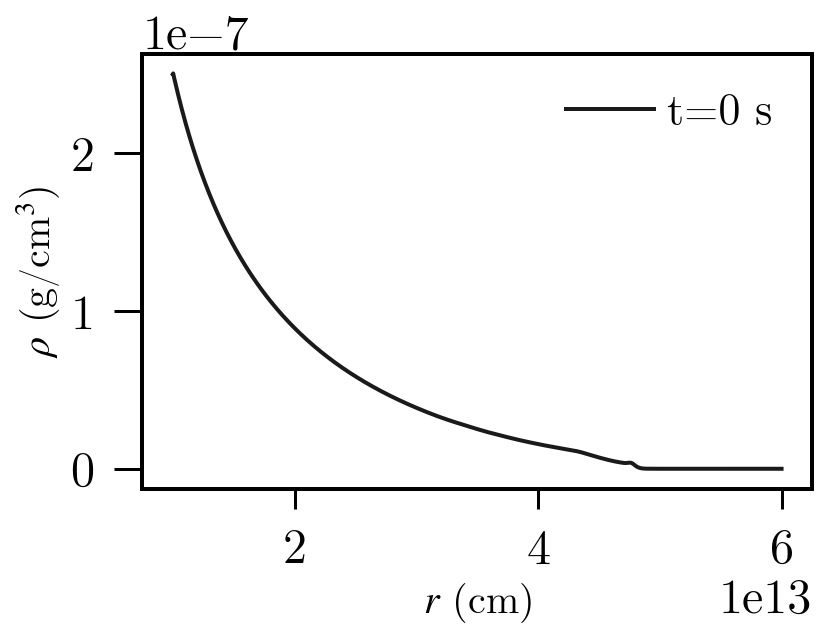

In [130]:
plot_prim('SN.out1.00500.athdf',0)

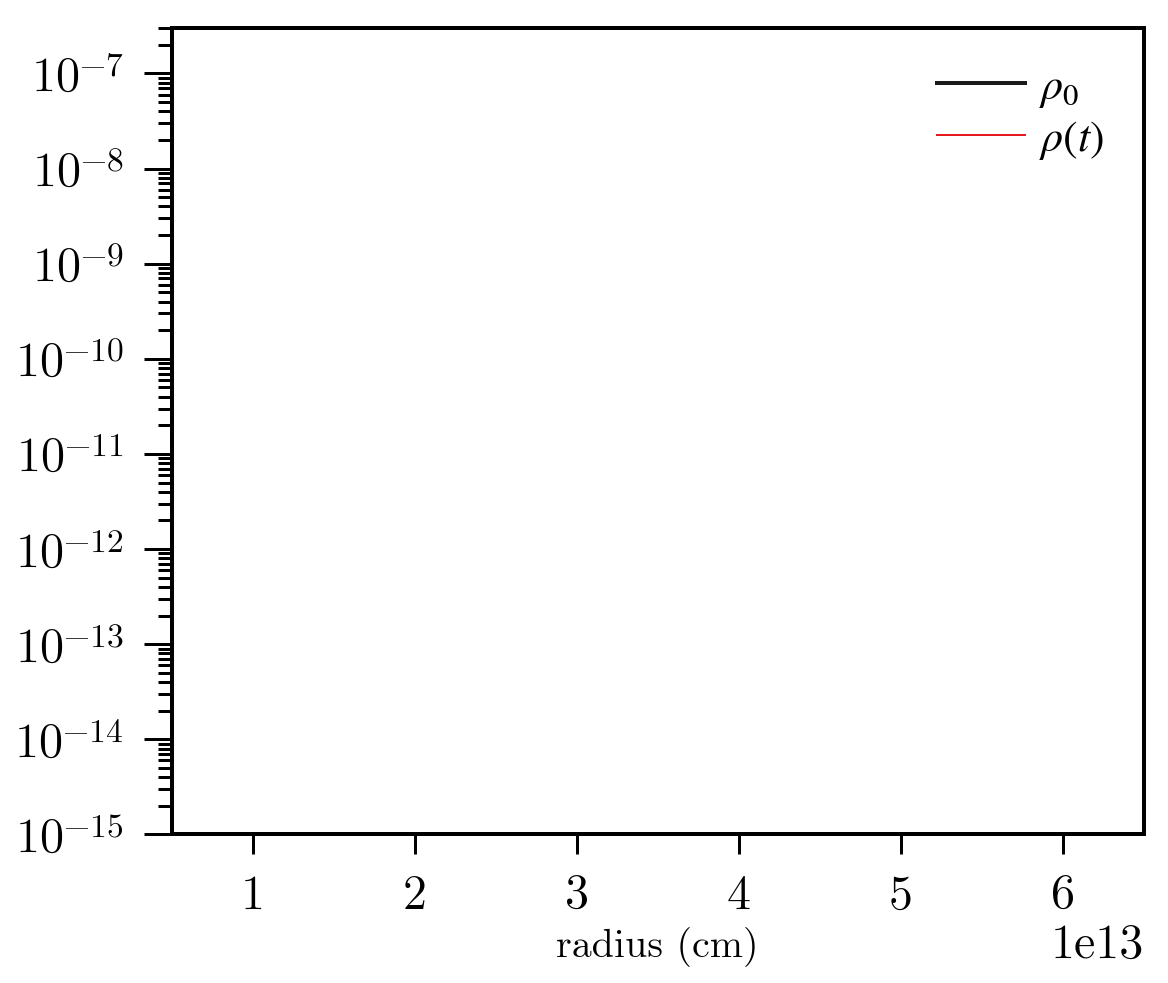

In [131]:
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(9,8))

ax.set_xlim((0.5e13,6.5e13 ))
ax.set_ylim((1e-15,3e-7))
# ax.set_yscale('log')

line1, = ax.plot([], [], lw=2, label=r'$\rho_0$')
line2, = ax.plot([], [], lw=1, label=r'$\rho(t)$')
time_text = ax.text(0.02, 0.92, '', transform=ax.transAxes, fontsize=20)

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return (line1,)


r, rho0 = get_prim('SN.out1.' + str(0).zfill(5) + '.athdf', 0)
# animation function. This is called sequentially
def animate(i):
    
    r, rho = get_prim('SN.out1.' + str(i).zfill(5) + '.athdf', 0)
    
    time_text.set_text('time = %.2e' %  (i*1e4) )
    
    line1.set_data(r, rho0)
    line2.set_data(r, rho)
    return (line1,)

ax.autoscale(enable=False, axis='both', tight=None)
fig.subplots_adjust(left=0.2, bottom=0.2, right=0.95, top=0.9, wspace=0.1, hspace=0.1)
ax.set_xlabel('radius (cm)')
ax.set_yscale('log')
ax.legend();

In [136]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=20, blit=True)
HTML(anim.to_html5_video())

In [ ]:
import h5py
f = h5py.File('SN.out2.00000.athdf', 'r')

In [12]:
list(f.keys())

['Levels',
 'LogicalLocations',
 'hydro',
 'x1f',
 'x1v',
 'x2f',
 'x2v',
 'x3f',
 'x3v']

In [13]:
f['hydro']

<HDF5 dataset "hydro": shape (2, 1, 1, 1, 7000), type ">f4">

In [14]:
# rho, press, vel1, vel2, vel3

# data1.colnames
plt.plot( r, dd[0], label='t=0 s' )
# plt.plot( r, data2['rho'], label=r't=$5 \times 10^4$ s' )
# plt.plot( r, data3['rho'], label=r't=$10 \times 10^4$ s' )

plt.plot( s13['col2'], s13['col4'] )

plt.ylabel(r'$\rho$ (g/cm$^3$)')
plt.xlabel(r'$r$ (cm)')
plt.legend()
plt.yscale('log')

NameError: name 'r' is not defined

In [67]:
s13 = Table.read('s13.0_profile.dat', format='ascii')
# s13[s13['col1'] > 2e13]
s13

col1,col2,col3,col4,col5,col6
float64,float64,float64,float64,float64,float64
4.8727694745440654e+33,3640311846.97243,-1879391.5820020018,1030.437965009212,265644373.3926115,2.875001481414931e+19
4.8837931201543804e+33,3705896451.485949,-1844649.789972161,991.3692669562499,261802427.0166739,2.7199464495873024e+19
4.8957473307445224e+33,3777336600.80502,-1812663.6371280057,951.1235627014767,257742017.42549387,2.56292824955156e+19
4.90589859797584e+33,3838256852.671865,-1787300.8895846277,914.5173107590086,253952218.09371558,2.4225540452390973e+19
4.916906583656216e+33,3904592694.5203505,-1759143.95852659,881.0437438601707,250400915.71188143,2.2962806292421657e+19
4.928843590729138e+33,3976850503.4638677,-1724554.5490665315,846.519803306539,246646668.03145945,2.1681830850489995e+19
4.9389800935931995e+33,4038465767.4633226,-1689446.7902883133,815.0797048179323,243141697.68785885,2.053460320269811e+19
4.9499718647670144e+33,4105552884.947232,-1643453.8855938162,786.3055322658703,239857454.74209023,1.950117094318953e+19
4.9618910675885185e+33,4178620094.325142,-1582775.0902437652,756.5980842946402,236385174.57274225,1.8451153408588538e+19


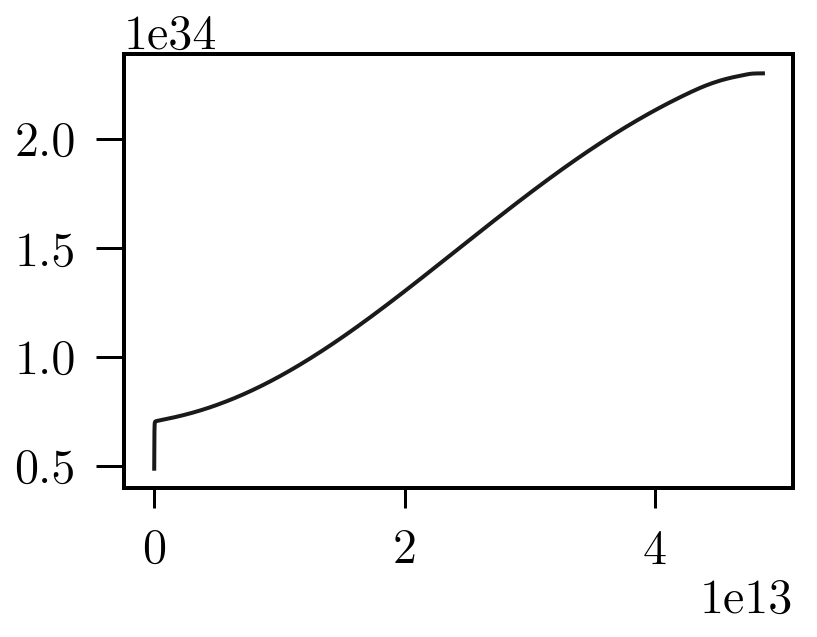

In [68]:
plt.plot( s13['col2'], s13['col1'] )

In [72]:
s13['col1']

4.8727694745440654e+33
4.8837931201543804e+33
4.8957473307445224e+33
4.90589859797584e+33
4.916906583656216e+33
4.928843590729138e+33
4.9389800935931995e+33
4.9499718647670144e+33
4.9618910675885185e+33
4.9720122964203295e+33
4.9829873010282914e+33


In [ ]:
4.87e33 + np.trapz(  (data1['rho']*4.*np.pi*data1['x1v']**2)[:5209], 
                   data1['x1v'][:5209] )

In [ ]:
'%.2e' % data1['x1v'][5209]

In [ ]:
np.argmin( (data1['x1v']-1e13)**2 )

In [ ]:
plt.plot(data1['x1v'], data1['vel1'])